# Project: Visualizing Race and Gender Representation In American Movies

In this project you'll use data visualization techniques to analyze how the top 50 movies of 2016 performed according to the <a href = "https://en.wikipedia.org/wiki/Bechdel_test" target="_blank"> Bechdel Test </a>and other representation-based tests. 

**The Bechdel-Wallace Test** — often abbreviated to the "Bechdel Test" — evaluates movies based on two simple questions:

  1.  Does the movie have at least two named female characters?
  2.  And do those characters have at least one conversation that is not about a man?

To perform your visualization, you'll use a dataset called  "The Next Bechdel Test" from <a href="https://www.fivethirtyeight.com" target="_blank">fivethirtyeight.com</a>. You can read more about the dataset at the following link:

<a href = "https://projects.fivethirtyeight.com/next-bechdel/" target="_blank">The Next Bechdel Test </a>


  
In addition to results of the Bechdel test, this dataset includes the results of similar representation tests developed by members of the movie industry and evaluated by <a href = "http://fivethirtyeight.com" target="_blank">fivethirtyeight.com. </a>

**The Waithe Test** (Lena Waithe)

A movie passes if:
- There's a black woman in the work
- Who's in a position of power
- And she's in a healthy relationship

**The Ko Test** (Naomi Ko)

A movie passes if:
- There's a non-white, female-identifying person in the film
- Who speaks in five or more scenes
- And speaks english


## 1. SETUP

Import matplotlib.pyplot as plt and pandas as pd.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Use Pandas `pd.read_csv()` to load the dataset **bechdelExpanded.csv** into a DataFrame and save the results to a variable. You can name the variable anything you like. `df` is often used as the variable name for a DataFrame.

In [2]:
df = pd.read_csv('bechdelExpanded.csv')

## 2. Learn About Your Data

Inspect the DataFrame using `.head()`

The first column in the dataset is the name of a movie. Each column that follows represents one of the tests being applied to each movie. Each row represents whether that movie passed, or failed each test. A `1` represents a passing score, and a `0` represents a failing score.

In [3]:
df.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1
1,Hidden Figures,1,0,0,0,0,1,1,1,1,1,1,1,1
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1
3,Finding Dory,0,0,1,0,0,0,1,1,1,1,1,1,0
4,Ghostbusters,0,0,0,0,0,1,0,1,1,1,1,1,1


Call `.info()` on your DataFrame and print the result. This will display a summary of the basic information about your DataFrame and its data.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie         50 non-null     object
 1   bechdel       50 non-null     int64 
 2   peirce        50 non-null     int64 
 3   landau        50 non-null     int64 
 4   feldman       50 non-null     int64 
 5   villareal     50 non-null     int64 
 6   hagen         50 non-null     int64 
 7   ko            50 non-null     int64 
 8   villarobos    50 non-null     int64 
 9   waithe        50 non-null     int64 
 10  koeze_dottle  50 non-null     int64 
 11  uphold        50 non-null     int64 
 12  white         50 non-null     int64 
 13  rees-davies   50 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 5.6+ KB
None


## 3. Data Manipulation
Create a column for total_score and set the value of each of its entries equal to the sum of the three columns: bechdel, waithe, ko. This will give us the total score each movie received based on these three tests.

In [5]:
df['total_score'] = df.bechdel + df.waithe + df.ko

Check your DataFrame again with `.head()` to see the new column.

In [6]:
df.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies,total_score
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1,0
1,Hidden Figures,1,0,0,0,0,1,1,1,1,1,1,1,1,3
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1,0
3,Finding Dory,0,0,1,0,0,0,1,1,1,1,1,1,0,2
4,Ghostbusters,0,0,0,0,0,1,0,1,1,1,1,1,1,1


## 4. Sorting Data

It will be easier to visualize our data if it is organized by each movie's total score.  

Using Pandas `.sort_values()`, create a new DataFrame called `df_sorted` that is a copy of your current DataFrame, sorted by `total_score`. Make sure to reset the index of the new DataFrame using `.reset_index(drop = True)`.

Hint: The syntax for sorting by a column in Pandas is:
`df.sort_values("column_name").reset_index(drop = True)`

In [8]:
df_sorted = df.sort_values("total_score").reset_index(drop = True)

Use .head() to check your new `df_sorted` DataFrame.

In [11]:
df_sorted.head(30)

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies,total_score
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1,0
1,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1,0
2,Boo! A Madea Halloween,0,0,1,1,1,1,0,1,0,0,1,1,1,0
3,Central Intelligence,1,0,1,1,1,1,0,1,0,1,1,1,1,1
4,Suicide Squad,0,0,1,1,1,1,0,1,1,1,1,1,0,1
5,Sausage Party,0,0,1,1,1,1,0,1,1,1,1,1,0,1
6,Fantastic Beasts and Where to Find Them,0,0,1,1,0,1,0,1,1,1,1,1,1,1
7,Sing,0,0,1,1,1,1,0,1,1,0,1,1,0,1
8,The Purge: Election Year,0,0,1,1,0,1,0,1,1,1,1,1,1,1
9,Ice Age: Collision Course,0,1,0,1,1,1,0,1,1,0,1,1,0,1


## 5. Isolating the Data
For this project, we have selected three of the representation tests to focus on. To make it easier for us to look at the relevant data, create a new DataFrame containing only the columns 'movie', 'bechdel', 'waithe', 'ko', 'total_score' from the `df_sorted` DataFrame.

In [17]:
df_partial = df_sorted[['movie', 'bechdel', 'waithe', 'ko', 'total_score' ]]

Use .head() to check the new DataFrame.

In [18]:
df_partial.head()

,movie,bechdel,waithe,ko,total_score
0,Bad Moms,0,0,0,0
1,Independence Day: Resurgence,0,0,0,0
2,Boo! A Madea Halloween,0,0,0,0
3,Central Intelligence,1,0,0,1
4,Suicide Squad,0,1,0,1


## 6. Plot DataFrame with Matplotlib


Next,  use Pandas to create a new DataFrame using only the data you want to use in a plot. Then, create a bar chart with that data using Matplotlib.


**6.A**

Using `[[]]` notation, select the columns `movie` and `total_score` from the DataFrame `df_partial`, then using `.set_index()`, set the `index` to the columns `movie`, and save it all to a variable named `ax`.


In [19]:
ax = df_partial[['movie', 'total_score']]
ax.set_index('movie')

,total_score
movie,
Bad Moms,0
Independence Day: Resurgence,0
Boo! A Madea Halloween,0
Central Intelligence,1
Suicide Squad,1
Sausage Party,1
Fantastic Beasts and Where to Find Them,1
Sing,1
The Purge: Election Year,1


**6.B**

Create a plot of the `ax` DataFrame with the Matplotlib method `.plot()`. Include the following arguments inside of `.plot()` . You can change these on your own and run the plot again if you would like.
- `kind = 'bar'`
- `title ='Representation In Movies'`
- `figsize=(15, 10)`
- `legend=True`


<AxesSubplot:title={'center':'Representation In Movies'}>

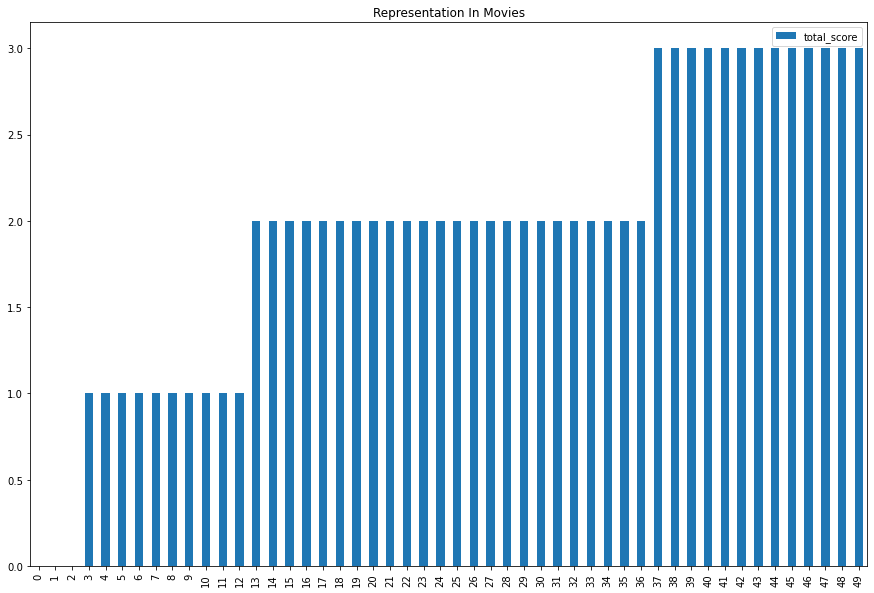

In [40]:
ax.plot(kind='bar', title='Representation In Movies', figsize=(15, 10), legend=True)



## 7. Iterate and Discover Meaning

There are many aspects of a Matplotlib plot that can be customized to make it easier to visualize data. Try a few of them below:

Set the `kind` argument of `.plot()` to `barh` to make the plot a horizontal bar chart.

Add the following argument to `.plot()` so it is easier to see the names of each movie: `fontsize=12`.

Make the visualization taller, and even the spread by changing the figsize argument to `figsize=(15, 15)`.

<AxesSubplot:title={'center':'Representation In Movies'}>

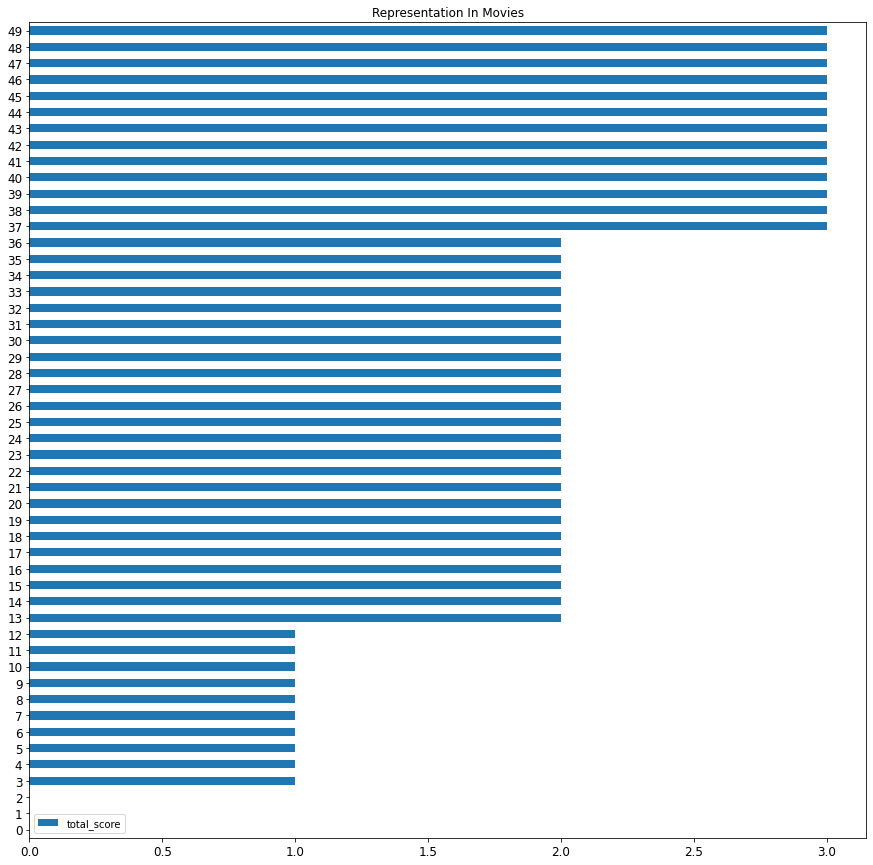

In [24]:
ax.plot(kind='barh', title='Representation In Movies', figsize=(15, 15), legend=True, fontsize=12)

## You're done! 

Feel free to use this notebook to continue experimenting. 

---